In [42]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [12]:
df = pd.read_csv("Online_Payments.csv")
df.head()        

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [14]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])

In [27]:
# Label Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")

C:\Users\Adham\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mapping of Label Encoded Classes
{'Fraud': 0, 'No Fraud': 1}
Label Encoded Target Variable
[1 1 0 ... 0 0 0]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, encoded_y, test_size=0.3, random_state=42)
print(X_test)

[[3.00000000e+00 3.30218420e+05 2.08660000e+04 3.51084420e+05]
 [2.00000000e+00 1.16470800e+04 3.03700000e+04 1.87229200e+04]
 [3.00000000e+00 1.52264210e+05 1.06589000e+05 2.58853210e+05]
 ...
 [2.00000000e+00 1.19878000e+03 2.29625100e+04 2.17637400e+04]
 [2.00000000e+00 3.34724200e+04 0.00000000e+00 0.00000000e+00]
 [3.00000000e+00 2.70211280e+05 1.09068362e+06 1.36089490e+06]]


In [59]:
kf = StratifiedKFold(n_splits=5)
pred_test_full =0
cv_score =[]
i=1
for train_index, test_index in kf.split(x, encoded_y):
    #print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = x[train_index],x[test_index]
    ytr,yvl = encoded_y[train_index],encoded_y[test_index]
    
    #model
    lr = LogisticRegression(C=2)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    #print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(xvl)[:,1]
    pred_test_full +=pred_test
    i+=1
print('Maximum Accuracy',max(cv_score)) 


Maximum Accuracy 0.9909311486134024


In [28]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      #results = cross_validate(estimator=model,
                       #         X=_X,
                       #        y=_y,
                       #        cv=_cv,
                       #        scoring=_scoring,
                       #        return_train_score=True)
      results 
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [29]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [31]:


model=LogisticRegression();
model_name="Logistic Regression"
result_2 = cross_validation(model, x,encoded_y, 5)
print(result_2)

{'Training Accuracy scores': array([0.99945934, 0.99950374, 0.99910709, 0.99950531, 0.99911829]), 'Mean Training Accuracy': 99.93387551040294, 'Training Precision scores': array([0.99996694, 0.99996674, 0.99917561, 0.99996536, 0.99919387]), 'Mean Training Precision': 0.9996537023472065, 'Training Recall scores': array([0.99949169, 0.99953635, 0.99993095, 0.9995393 , 0.99992387]), 'Mean Training Recall': 0.9996844315944499, 'Training F1 scores': array([0.99972926, 0.9997515 , 0.99955314, 0.99975228, 0.99955874]), 'Mean Training F1 Score': 0.9996689821341223, 'Validation Accuracy scores': array([0.99946641, 0.99952142, 0.99916544, 0.99949078, 0.99913322]), 'Mean Validation Accuracy': 99.9355454199685, 'Validation Precision scores': array([0.99997087, 0.99997166, 0.99920509, 0.99997717, 0.99917366]), 'Mean Validation Precision': 0.9996596915638516, 'Validation Recall scores': array([0.99949484, 0.99954913, 0.99995987, 0.99951294, 0.99995908]), 'Mean Validation Recall': 0.9996951722397343,

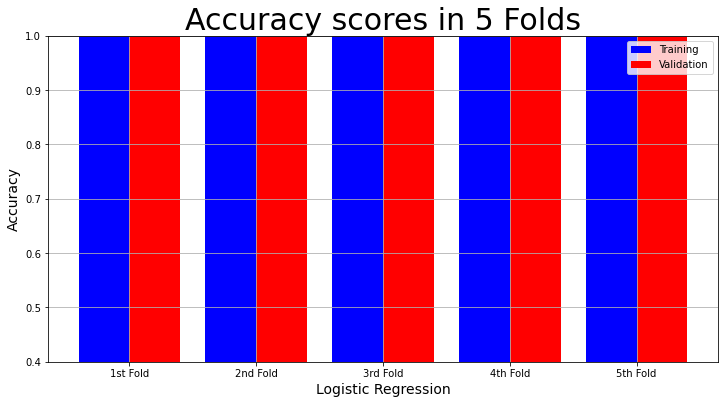

In [32]:
# Plot Accuracy Result
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            result_2["Training Accuracy scores"],
            result_2["Validation Accuracy scores"])

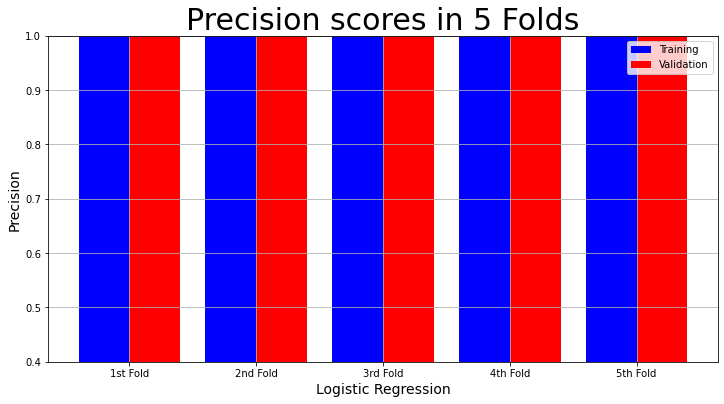

In [33]:
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            result_2["Training Precision scores"],
            result_2["Validation Precision scores"])

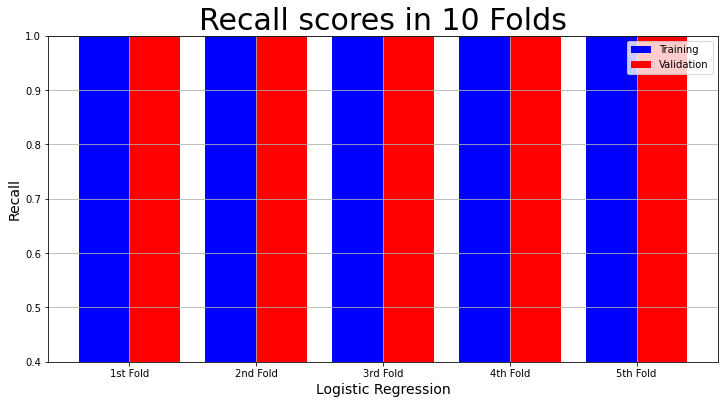

In [35]:
#The training recall and validation recall in each fold:

# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 10 Folds",
            result_2["Training Recall scores"],
            result_2["Validation Recall scores"])

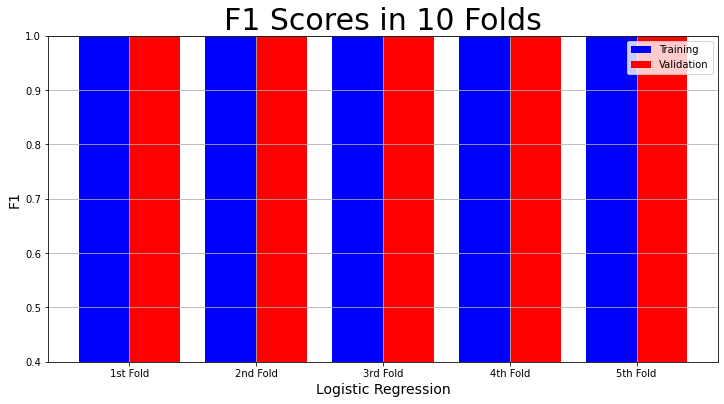

In [36]:
# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 10 Folds",
            result_2["Training F1 scores"],
            result_2["Validation F1 scores"])